import statements

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.tree import export_graphviz
from sklearn import tree
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import graphviz

read csv

In [2]:
data = pd.read_csv('input/BackOrders.csv')

head

In [3]:
pd.options.display.html.table_schema = True
pd.options.display.max_rows = None
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No


data-types

In [4]:
data.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

drop na values

In [5]:
data.shape
data.dropna(axis=0, inplace=True)
data.shape
print(61589-58186)

3403


drop columns

In [6]:
data.drop('sku', axis=1, inplace=True)

summary statistics of numerical features

In [7]:
data.describe() # data.describe(include='all') gives info about num + cat

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,58186.000000,58186.000000,58186.000000,5.818600e+04,5.818600e+04,5.818600e+04,58186.000000,58186.000000,5.818600e+04,5.818600e+04,58186.000000,58186.000000,58186.000000,58186.000000,58186.000000
mean,281.245987,7.559619,31.338123,1.780929e+02,3.313014e+02,4.771002e+02,45.347575,153.180610,2.888281e+02,4.289081e+02,43.424415,1.696766,-0.840541,-0.416599,1.259977
std,4321.329801,6.498952,814.665767,5.438487e+03,1.005456e+04,1.460902e+04,1408.074630,5360.176586,9.101474e+03,1.304183e+04,979.291691,43.525034,12.567315,10.786604,30.819641
min,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.680000,0.670000,0.000000
50%,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,2.000000,4.000000e+00,6.000000e+00,0.000000,0.000000,0.830000,0.820000,0.000000
75%,55.000000,8.000000,0.000000,1.400000e+01,2.800000e+01,4.200000e+01,6.000000,18.000000,3.600000e+01,5.400000e+01,4.000000,0.000000,0.970000,0.950000,0.000000
max,673445.000000,52.000000,170976.000000,1.126656e+06,2.094336e+06,3.062016e+06,295197.000000,934593.000000,1.799099e+06,2.631590e+06,192978.000000,7392.000000,1.000000,1.000000,2999.000000


summary statistics of object type features

In [8]:
data.describe(include='object')

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,58186,58186,58186,58186,58186,58186,58186
unique,2,2,2,2,2,2,2
top,No,No,No,No,Yes,No,No
freq,58107,46791,58174,50916,56736,58173,47217


get count of unique items in a column

In [9]:
data.nunique()

national_inv         2756
lead_time              28
in_transit_qty        894
forecast_3_month     1614
forecast_6_month     2185
forecast_9_month     2654
sales_1_month        1066
sales_3_month        1887
sales_6_month        2627
sales_9_month        3157
min_bank             1068
potential_issue         2
pieces_past_due       190
perf_6_month_avg      102
perf_12_month_avg     102
local_bo_qty          200
deck_risk               2
oe_constraint           2
ppap_risk               2
stop_auto_buy           2
rev_stop                2
went_on_backorder       2
dtype: int64

get a list of columns that are of dtype 'object'

In [10]:
object_attr = list(data.select_dtypes('object').columns)
object_attr

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

convert column type object to cat

In [11]:
for item in object_attr:
    data[item] = data[item].astype('category')

validate above operation

In [12]:
data.describe(include='category')

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,58186,58186,58186,58186,58186,58186,58186
unique,2,2,2,2,2,2,2
top,No,No,No,No,Yes,No,No
freq,58107,46791,58174,50916,56736,58173,47217


data-types after type casting

In [13]:
data.dtypes

national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

columns without target variable

In [14]:
object_attr.remove('went_on_backorder')
cat_attr = object_attr
cat_attr

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop']

dummification of target variables

In [15]:
data = pd.get_dummies(data, columns=cat_attr, prefix=cat_attr, prefix_sep='_', drop_first=True)
data.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'went_on_backorder', 'potential_issue_Yes',
       'deck_risk_Yes', 'oe_constraint_Yes', 'ppap_risk_Yes',
       'stop_auto_buy_Yes', 'rev_stop_Yes'],
      dtype='object')

check head to see new columns added after dummification

In [16]:
data.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,went_on_backorder,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
1,7,2.0,0,0,0,0,0,0,0,0,...,0.50,0.28,0,No,0,1,0,0,1,0
2,258,15.0,10,10,77,184,46,132,256,365,...,0.54,0.70,0,No,0,0,0,0,1,0
3,46,2.0,0,0,0,0,1,2,6,9,...,0.75,0.90,0,No,0,1,0,0,1,0
4,2,2.0,0,4,6,10,2,2,5,6,...,0.97,0.92,0,No,0,0,0,0,1,0
5,297,12.0,0,0,0,0,5,6,44,57,...,0.58,0.75,0,No,0,1,0,0,1,0


Define predictors and target variables

In [17]:
X, y = data.drop('went_on_backorder', axis=1), data.went_on_backorder

train test train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

validate the splitting operation

In [19]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(58186, 21)
(40730, 21)
(17456, 21)


Validate whether or not our splitting operation is stratified

In [20]:
print(y_train.value_counts())
print(y_train.value_counts()/X_train.shape[0])
print(y_test.value_counts()/X_test.shape[0])

No     33067
Yes     7663
Name: went_on_backorder, dtype: int64
No     0.811859
Yes    0.188141
Name: went_on_backorder, dtype: float64
No     0.81061
Yes    0.18939
Name: went_on_backorder, dtype: float64


 Basic Modeling

instantiating model_selection

In [21]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

predict on train data first

In [22]:
y_train_pred = model_dt.predict(X_train)
y_test_pred = model_dt.predict(X_test)

confusion matrix on train to determine how it learnt

In [23]:
confusion_matrix(y_true=y_train, y_pred=y_train_pred)

array([[33047,    20],
       [   69,  7594]])

confusion matrix on test to determine how it performed

In [24]:
confusion_matrix(y_true=y_test, y_pred=y_test_pred)

array([[13202,   948],
       [  757,  2549]])

accuracy score on train prediction

In [25]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.9978148784679597

accuracy score on test prediction

In [26]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.9023258478460129

get tree length (if interested)

In [27]:
print(model_dt.get_depth())

26


get tree length with leaves (if interested)

In [28]:
print(model_dt.get_n_leaves())

3335


recall score on train prediction

In [29]:
recall_score(y_true=y_train, y_pred=y_train_pred, pos_label='Yes')

0.9909956935925878

recall score on test prediction

In [30]:
recall_score(y_true=y_test, y_pred=y_test_pred, pos_label='Yes')

0.7710223835450696

feature importance

In [31]:
feature_importances = model_dt.feature_importances_
feature_importances

array([3.12318056e-01, 3.26199385e-02, 3.15332296e-02, 9.13773730e-02,
       2.83516694e-02, 1.11023953e-01, 6.96727368e-02, 3.47246736e-02,
       4.68089094e-02, 4.70727573e-02, 3.06575406e-02, 7.47383773e-03,
       5.71569889e-02, 6.47414725e-02, 1.00895021e-02, 1.28746597e-04,
       1.20806098e-02, 0.00000000e+00, 9.86384271e-03, 2.30416316e-03,
       0.00000000e+00])

plot feature_importances

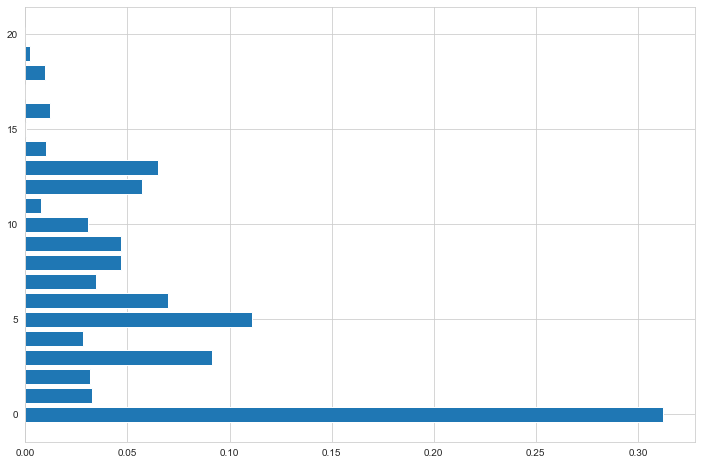

In [32]:
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.barh(range(len(feature_importances)), feature_importances)
plt.show()

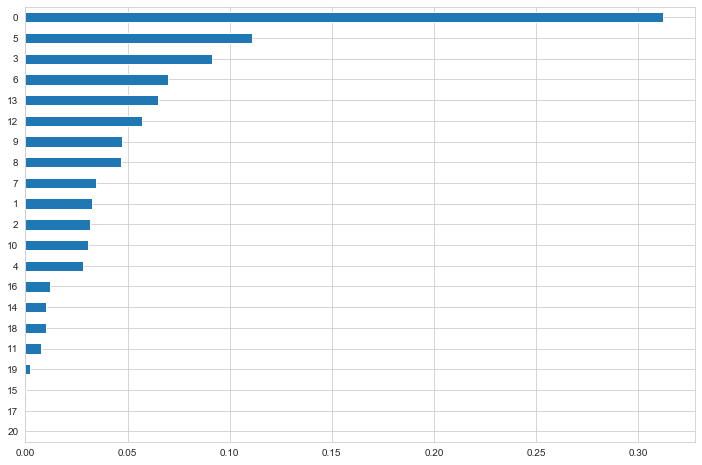

In [33]:

plt.figure(figsize = (12,8))
d_f = pd.DataFrame(feature_importances)
d_f[0].sort_values().plot(kind='barh')
plt.show()

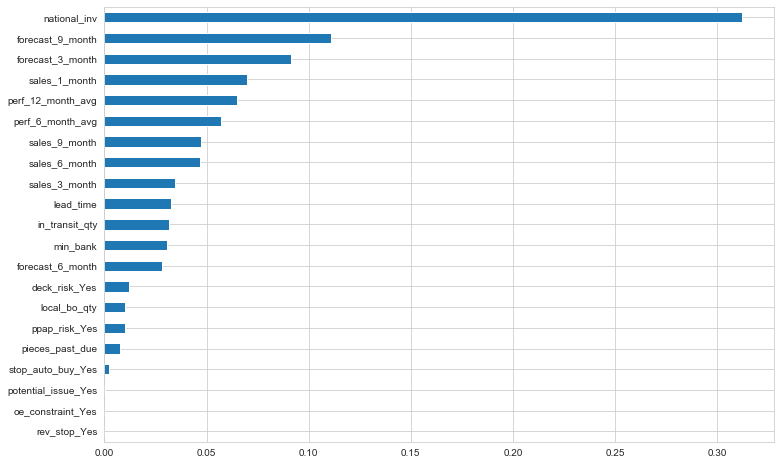

In [34]:
plt.figure(figsize = (12,8))
pd.Series(feature_importances,X.columns).sort_values().plot(kind="barh")
plt.show()

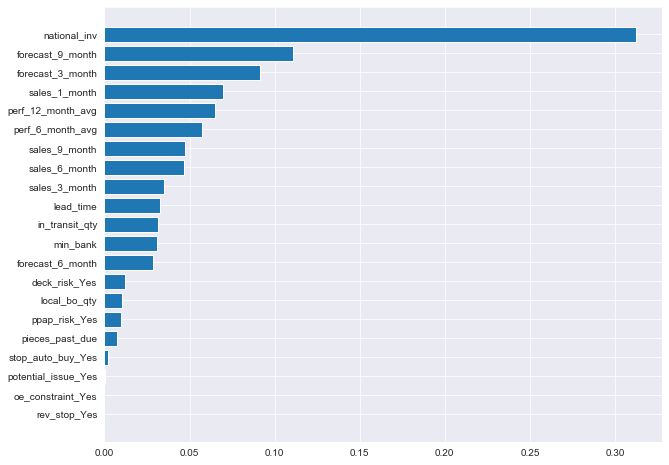

In [35]:
features = list(X_train.columns)
sorted_indices = np.argsort(feature_importances)
plt.figure(figsize = (10,8))
sns.set_style('darkgrid')
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices])
plt.yticks(range(len(feature_importances)), [features[i] for i in sorted_indices])
plt.show()

  Model 2

In [36]:
model_dt2 = DecisionTreeClassifier(max_leaf_nodes=20)
model_dt2.fit(X_train, y_train)
# predict on train data first
y_train_pred2 = model_dt2.predict(X_train)
y_test_pred2 = model_dt2.predict(X_test)

confusion matrix on train to determine how it learnt

In [37]:
confusion_matrix(y_true=y_train, y_pred=y_train_pred2)

array([[31151,  1916],
       [ 2592,  5071]])

confusion matrix on test to determine how it performed

In [38]:
confusion_matrix(y_true=y_test, y_pred=y_test_pred2)

array([[13301,   849],
       [ 1119,  2187]])

accuracy score on train prediction

In [39]:
accuracy_score(y_true=y_train, y_pred=y_train_pred2)

0.8893199116130617

accuracy score on test prediction

In [40]:
accuracy_score(y_true=y_test, y_pred=y_test_pred2)

0.8872593950504125

get tree length (if interested)

In [41]:
print(model_dt2.get_depth())

7


get tree length with leaves (if interested)

In [42]:
print(model_dt2.get_n_leaves())

20


recall score on train prediction

In [43]:
recall_score(y_true=y_train, y_pred=y_train_pred2, pos_label='Yes')

0.6617512723476445

recall score on test prediction

In [44]:
recall_score(y_true=y_test, y_pred=y_test_pred2, pos_label='Yes')

0.661524500907441

feature importance

In [45]:
feature_importances2 = model_dt2.feature_importances_
feature_importances2

array([0.54987323, 0.        , 0.02233455, 0.12100624, 0.        ,
       0.15941685, 0.0891661 , 0.        , 0.03853863, 0.        ,
       0.        , 0.00483304, 0.        , 0.        , 0.01483136,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

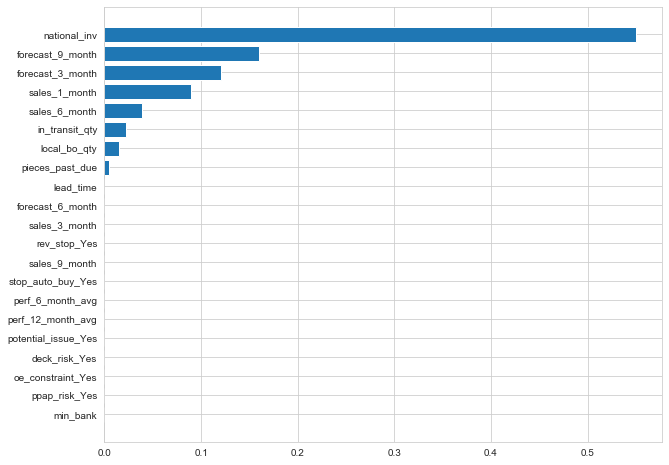

In [46]:
sorted_indices2 = np.argsort(feature_importances2)
plt.figure(figsize = (10,8))
sns.set_style('whitegrid')
plt.barh(range(len(feature_importances2)), feature_importances2[sorted_indices2])
plt.yticks(range(len(feature_importances2)), [features[i] for i in sorted_indices2])
plt.show()

In [47]:
y_train.head()

24039     No
12800    Yes
59501    Yes
35410     No
27604     No
Name: went_on_backorder, dtype: category
Categories (2, object): [No, Yes]

 Model - Grid CV

In [48]:
param_grid = {'criterion':["gini","entropy"],'max_depth':[None,15,20,25],'min_samples_split':[2,10,20,30]}
dt_cv_model = DecisionTreeClassifier()
gs_object = GridSearchCV(dt_cv_model,param_grid=param_grid,verbose=10,n_jobs=-1, cv=3)
gs_object.fit(X_train.values,y_train.values)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  83 out of  96 | elapsed:    4.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  93 out of  96 | elapsed:    4.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [49]:
gs_object.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__presort': 'deprecated',
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'iid': 'deprecated',
 

In [50]:
gs_object.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}

In [51]:
gs_object.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
y_train_grid_pred = gs_object.predict(X_train)
y_test_grid_pred = gs_object.predict(X_test)

In [53]:
confusion_matrix(y_train,y_train_grid_pred)

array([[33047,    20],
       [   69,  7594]])

In [54]:
confusion_matrix(y_test,y_test_grid_pred)


array([[13207,   943],
       [  770,  2536]])